In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [95]:
centroid = gpd.read_file("PLUTO/centroid.shp")
station = gpd.read_file("PLUTO/station.shp")
area_of_interest =  gpd.read_file("PLUTO/area_of_interest.shp")
distance = pd.read_csv("PLUTO/distance.csv",skipinitialspace=True)

In [96]:
centroid.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,ORIG_FID,FID_1,distance_m,nearest_st,geometry
0,MN,1440,49,108,118,5000,02,5,10065,L016,...,1,16V2,0,618.608412,21097.198093,0,0,524.991986,0,POINT (995035.9895640027 217823.273487863)
1,MN,1422,7501,108,118,3000,02,4,10065,L016,...,1,16V2,7,310.861563,5401.336650,1,1,391.962637,0,POINT (994908.0738900218 218433.0685313702)
2,MN,1422,36,108,118,3000,02,4,10065,L016,...,1,16V2,0,236.647242,1791.806600,2,2,363.777781,0,POINT (994937.7791981822 218532.9255968999)
3,MN,1422,2,108,118,3000,02,4,10065,L016,...,1,16V2,0,354.522266,7696.616852,3,3,419.980016,0,POINT (994650.6749294185 218590.6895087425)
4,MN,1424,43,108,126,4000,02,4,10021,L016,...,1,16V2,0,270.246724,2999.465059,4,4,247.816025,0,POINT (995026.5269116737 219078.4526788994)


In [97]:
area_of_interest.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,FID_1,distance_m,nearest_st,geometry
0,MN,1440,49,108,118,5000,02,5,10065,L016,...,05/07/2009,1,16V2,0,618.608412,21097.198093,0,524.991986,0,"POLYGON ((995131.005400002 217889.4583999962, ..."
1,MN,1422,7501,108,118,3000,02,4,10065,L016,...,05/01/2006,1,16V2,7,310.861563,5401.336650,1,391.962637,0,"POLYGON ((994921.264200002 218484.6298000068, ..."
2,MN,1422,36,108,118,3000,02,4,10065,L016,...,,1,16V2,0,236.647242,1791.806600,2,363.777781,0,"POLYGON ((994969.8884000033 218572.5766000003,..."
3,MN,1422,2,108,118,3000,02,4,10065,L016,...,,1,16V2,0,354.522266,7696.616852,3,419.980016,0,"POLYGON ((994713.3367999941 218599.4177999944,..."
4,MN,1424,43,108,126,4000,02,4,10021,L016,...,,1,16V2,0,270.246724,2999.465059,4,247.816025,0,"POLYGON ((995064.7611999959 219118.5095999986,..."


In [98]:
area_of_interest.distance_m = area_of_interest.distance_m.astype('str')

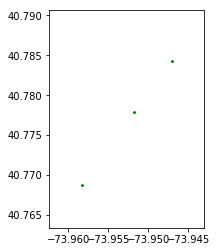

In [99]:
station.plot(marker='*', color='green', markersize=5);
station = station.to_crs(area_of_interest.crs)

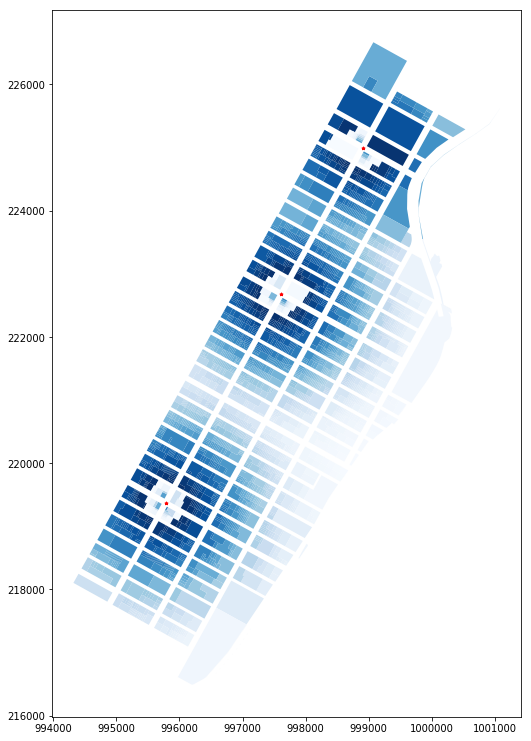

In [100]:
fig = plt.figure(figsize=[10,13])
ax = fig.add_subplot(111)
ax.set_aspect('equal')
area_of_interest.plot(column='distance_m', cmap='Blues_r',ax=ax,alpha=1)
station.plot(ax=ax, marker='*', color='red', markersize=10)

In [101]:
distance.head()

,FID,distance(m),nearest station
0,0.0,524.991986,0.0
1,1.0,391.962637,0.0
2,2.0,363.777781,0.0
3,3.0,419.980016,0.0
4,4.0,247.816025,0.0


In [105]:
print distance.columns

Index([u'FID', u'distance(m)', u'nearest station'], dtype='object')


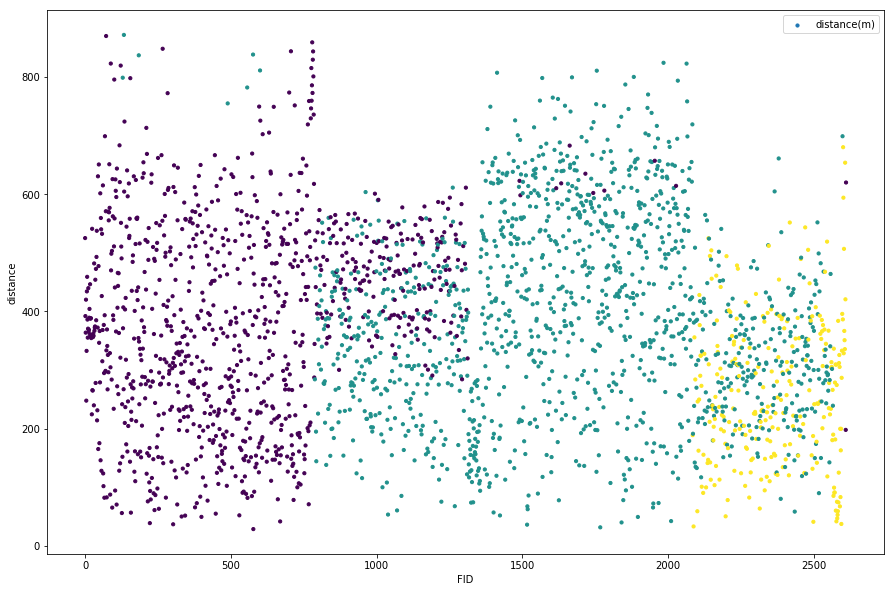

In [119]:
fig = plt.figure(figsize = [15,10])
ax = fig.add_subplot(111)

plt.scatter(distance[u'FID'],distance[u'distance(m)'],c=distance[u'nearest station'], s=10)
plt.xlabel('FID')
plt.ylabel('distance')
plt.legend()
plt.show()